#Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import librosa
import os
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Practica IA/clean_audio_extract.csv")

Dataset trabajado en la etapa de exploracion.

In [ ]:
data

,File_Name,Amplitude,ZCR,RMSE,SC,SB,Real,MFCC1,MFCC2,MFCC3,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,type
0,/content/drive/MyDrive/training/fake/file8817.mp3,0.581825,0.074166,0.069132,1460.193400,1266.254565,0,-358.50616,87.608055,-29.780224,...,-21.308332,3.202286,-8.422161,-1.287295,-11.246232,-7.675487,-3.954796,-8.051794,-2.104316,AI
1,/content/drive/MyDrive/training/fake/file8781.mp3,0.507742,0.149453,0.064688,2494.034047,2123.578832,0,-262.03930,96.501470,11.322632,...,-0.077602,8.243230,-21.282827,0.848746,-2.677096,-4.481322,-13.358309,-1.475551,-11.177357,AI
2,/content/drive/MyDrive/training/fake/file878.mp3,0.505204,0.063050,0.052523,1200.317416,1163.542630,0,-411.80500,93.012690,-9.946503,...,-4.538390,-6.040828,3.568661,0.271002,-9.668760,-0.226046,-3.677934,-4.277457,-3.038486,AI
3,/content/drive/MyDrive/training/fake/file8846.mp3,0.508133,0.084437,0.091705,1411.678982,1176.135602,0,-314.68024,131.686890,-9.615742,...,-3.274670,3.378773,-11.475774,-2.636361,-7.948193,-6.033540,-7.187921,2.895848,-7.033752,AI
4,/content/drive/MyDrive/training/fake/file874.mp3,0.823851,0.059144,0.110619,961.472741,826.195035,0,-331.99915,126.698470,-1.710027,...,-5.897218,-16.951845,9.498406,-15.397757,-11.470468,-1.510570,-15.892404,-8.756414,-3.444654,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,/content/drive/MyDrive/training/real/file8224.wav,0.725464,0.209182,0.063085,3262.453925,2147.422973,1,-285.68410,47.727993,12.921934,...,-17.249073,-16.564758,-19.512133,-23.978361,-18.578716,-3.815311,-16.754553,-4.635513,-20.137570,Real
2492,/content/drive/MyDrive/training/real/file8219.wav,0.237299,0.019057,0.032441,779.383442,1229.874561,1,-426.54254,128.420120,12.865620,...,6.073152,9.576747,4.489580,5.678951,8.130897,3.902583,3.593823,5.653460,3.412002,Real
2493,/content/drive/MyDrive/training/real/file8226.wav,0.598969,0.155462,0.066537,2526.511997,1935.122019,1,-290.64243,92.607780,-2.352955,...,-35.853190,-16.988342,-12.929439,-21.136171,-16.044697,-1.685133,-16.550385,-2.519914,-14.827551,Real
2494,/content/drive/MyDrive/training/real/file8210.wav,0.523895,0.166722,0.060643,2583.824280,1937.444056,1,-310.30515,82.331720,13.609283,...,-31.366016,-14.616156,-15.339861,-20.974232,-20.816960,2.185699,-23.133835,-8.508043,-11.928598,Real


In [ ]:
X = data.drop(columns=['Real', 'File_Name', 'type'])  # Elimina las columnas no necesarias
y = data['Real']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Cantidad de datos en el conjunto de entrenamiento (X_train):", len(X_train))
print("Cantidad de datos en el conjunto de validación (X_val):", len(X_val))
print("Cantidad de datos en el conjunto de prueba (X_test):", len(X_test))

Cantidad de datos en el conjunto de entrenamiento (X_train): 1747
Cantidad de datos en el conjunto de validación (X_val): 374
Cantidad de datos en el conjunto de prueba (X_test): 375


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [4, 6 , 8],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Crea el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
#Ajuste del GridSearchCV y extracción de mejores hiperparámetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [4, 6, 8]},
             scoring='accuracy')

In [ ]:
print("Mejores Parametros:", grid_search.best_params_)

Mejores Parametros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 8}


In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=8, random_state=42)

In [ ]:
val_accuracy = best_rf_model.score(X_val, y_val)
print("Precisión en la validación: {:.2f}".format(val_accuracy))

Precisión en la validación: 0.97


In [ ]:
test_accuracy = best_rf_model.score(X_test, y_test)
print("Precision con el conjunto de prueba: {:.2f}".format(test_accuracy))

Precision con el conjunto de prueba: 0.98


In [ ]:
# Predicciones en el conjunto de validación
y_val_pred = best_rf_model.predict(X_val)
# Evaluación de las predicciones en el conjunto de validación
print("Accuracy Score (Validation Set):", accuracy_score(y_val, y_val_pred))
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Evaluación del rendimiento del mejor modelo en el conjunto de prueba
test_accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on test set with best parameters: {:.2f}".format(test_accuracy))

Accuracy Score (Validation Set): 0.9705882352941176
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       178
           1       0.99      0.95      0.97       196

    accuracy                           0.97       374
   macro avg       0.97      0.97      0.97       374
weighted avg       0.97      0.97      0.97       374

Accuracy on test set with best parameters: 0.98


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

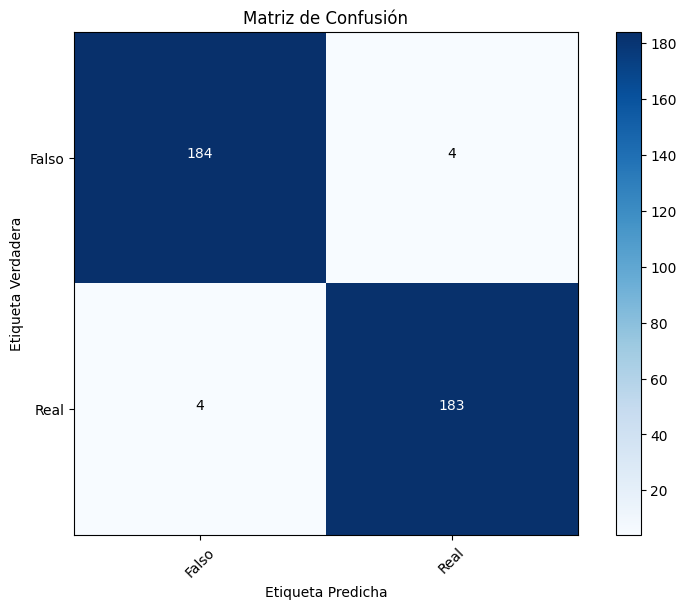

In [ ]:
# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
# Define las etiquetas de las clases
classes = ['Falso', 'Real']

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

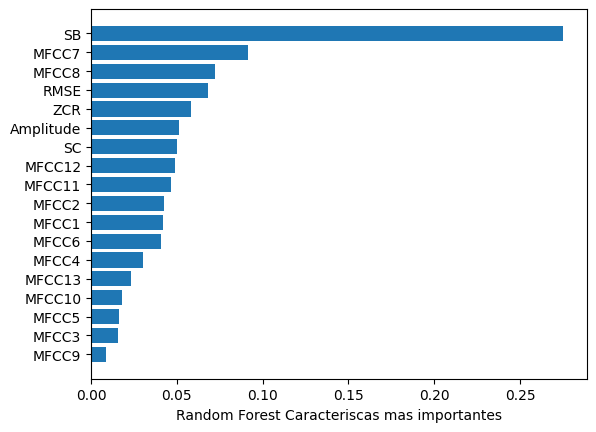

In [ ]:
feature_importances = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Random Forest Caracteriscas mas importantes")
plt.show()

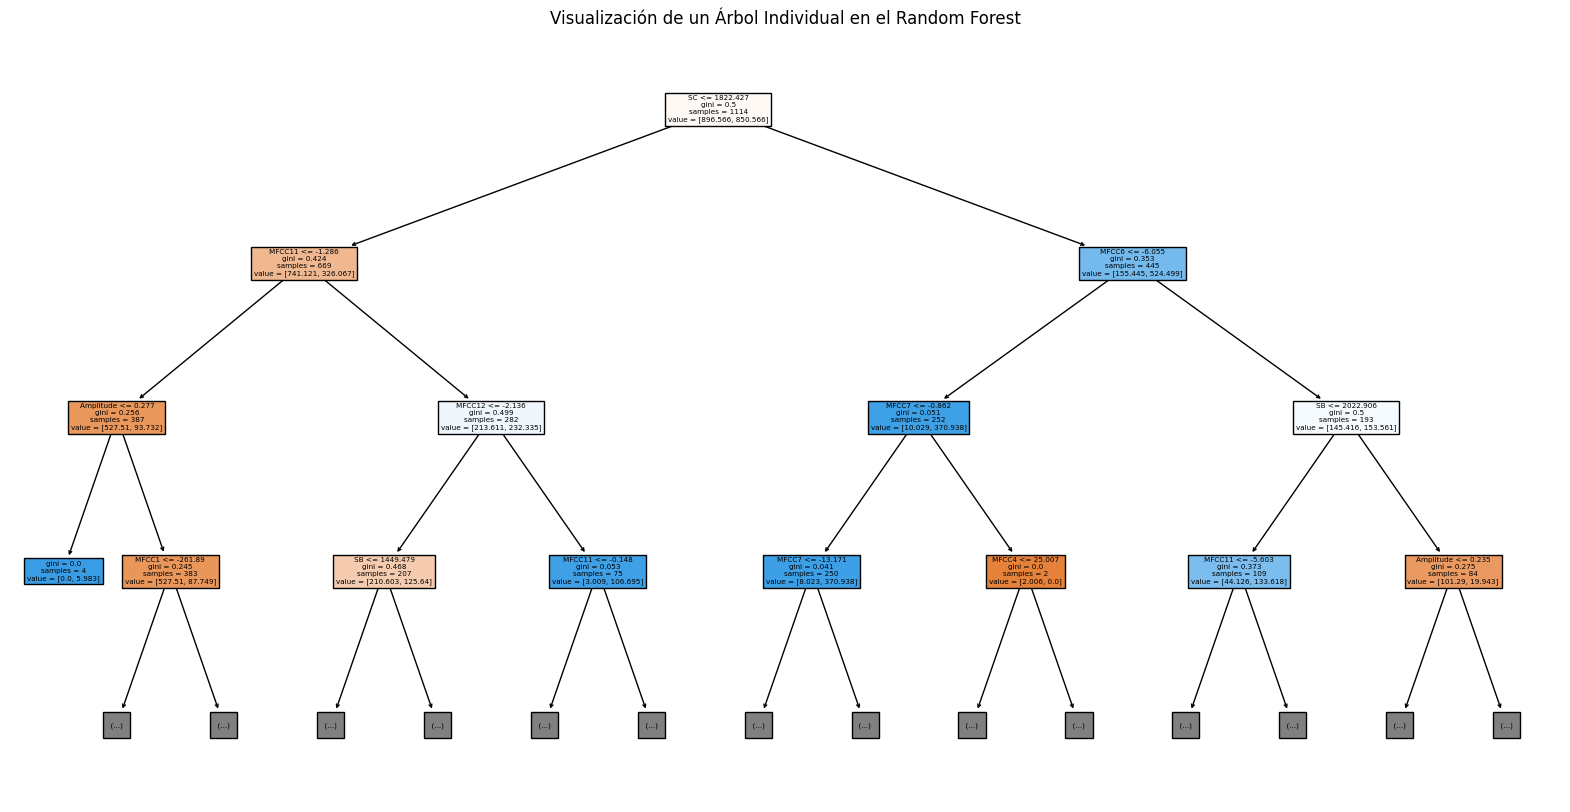

In [ ]:
# Visualizar el primer árbol del Random Forest
plt.figure(figsize=(20,10))
plot_tree(best_rf_model.estimators_[2], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Visualización de un Árbol Individual en el Random Forest")
plt.show()

#Metricas:

In [ ]:
print(len(y_val), len(y_pred))

374 375


In [ ]:
y_pred = best_rf_model.predict(X_val)
print(y_pred.shape)


(374,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Roc-AUC: {roc_auc}")

Accuracy: 0.9705882352941176
Precision: 0.9894179894179894
Recall: 0.9540816326530612
F1-score: 0.9714285714285714
Roc-AUC: 0.9714228387984407


Curva de ROC:

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

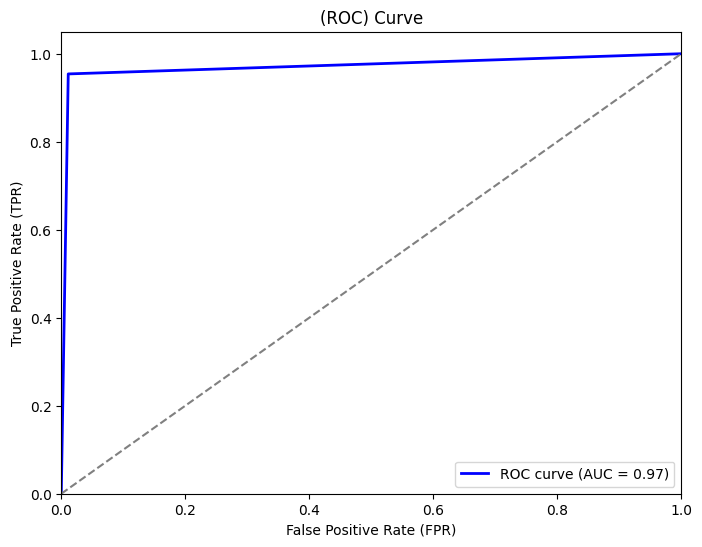

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Descargar el modelo:

In [ ]:
import pickle

# Guardar el modelo entrenado en un archivo
with open('modelo_entrenado_rf.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

In [ ]:
import warnings

# Desactivar todas las advertencias
warnings.filterwarnings("ignore")

#Pruebas con audios externos

Fuente de estos audios (en español): https://data.mendeley.com/datasets/ytkv9w92t6/1

Predicción con audios fake y reales:

In [ ]:
def calcular_caracteristicas(audio_path):
    # Cargar el audio
    y, sr = librosa.load(audio_path)

    # Calcular las características
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    energy = np.sum(y ** 2)
    rmse = np.mean(librosa.feature.rms(y=y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Crear un array con las características
    features = [zero_crossing_rate, energy, rmse, spectral_centroid]
    features.extend(mfccs_mean)
    features.append(spectral_bandwidth)

    return features

# Ruta del directorio que contiene los archivos de audio
directory2 = "/content/drive/MyDrive/Practica IA/fakee/Fake voice recordings (Imitation)/audios"

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory2):
    if filename.endswith(".wav"):  # Solo procesar archivos de audio WAV
        audio_path = os.path.join(directory2, filename)

        # Calcular las características del audio
        audio_features = calcular_caracteristicas(audio_path)

        # Utilizar el modelo de Random Forest para predecir la clase del audio
        prediction = best_rf_model.predict([audio_features])

        # Imprimir la predicción
        if prediction == 1:  # Cambiado de 1 a 0 para audios falsos
            print(f"El audio {filename} es clasificado como REAL.")
        else:
            print(f"El audio {filename} es clasificado como FAKE.")

El audio fake3_1.wav es clasificado como REAL.
El audio fake3_4.wav es clasificado como REAL.
El audio fake2_4.wav es clasificado como REAL.
El audio fake1_7.wav es clasificado como FAKE.
El audio fake2_5.wav es clasificado como FAKE.
El audio fake1_1.wav es clasificado como FAKE.
El audio fake1_5.wav es clasificado como REAL.
El audio fake2_3.wav es clasificado como REAL.
El audio fake1_8.wav es clasificado como REAL.
El audio fake2_7.wav es clasificado como REAL.
El audio fake2_8.wav es clasificado como REAL.
El audio fake2_6.wav es clasificado como REAL.
El audio fake1_10.wav es clasificado como FAKE.
El audio fake3_2.wav es clasificado como REAL.
El audio fake3_3.wav es clasificado como REAL.
El audio fake2_1.wav es clasificado como REAL.
El audio fake1_3.wav es clasificado como REAL.
El audio fake1_6.wav es clasificado como FAKE.
El audio fake1_2.wav es clasificado como FAKE.
El audio fake2_9.wav es clasificado como REAL.
El audio fake1_4.wav es clasificado como REAL.
El audio fak

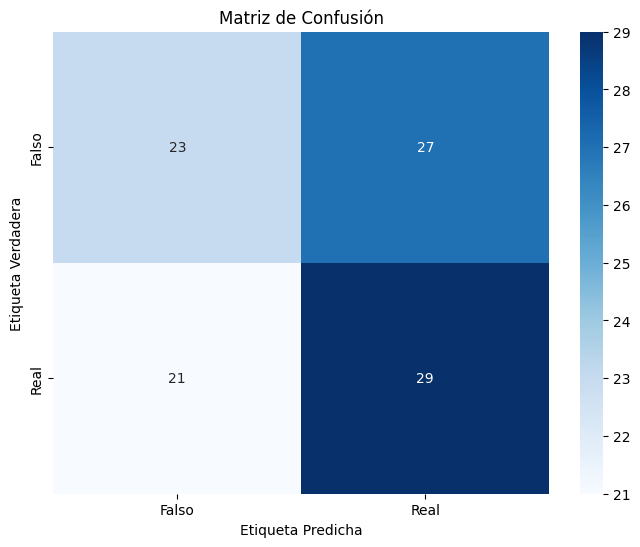

In [ ]:
# Listas para almacenar las etiquetas verdaderas y las predicciones
true_labels = []
predicted_labels = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory2):
    if filename.endswith(".wav"):  # Solo procesar archivos de audio WAV
        audio_path = os.path.join(directory2, filename)

        # Calcular las características del audio
        audio_features = calcular_caracteristicas(audio_path)

        # Utilizar el modelo de Random Forest para predecir la clase del audio
        prediction = best_rf_model.predict([audio_features])

        # Almacenar la etiqueta verdadera y la predicción
        true_labels.append(0 if "fake" in filename else 1)  # Si el nombre del archivo contiene "Fake", la etiqueta verdadera es 0, de lo contrario es 1
        predicted_labels.append(prediction[0])

# Construir la matriz de confusión
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Falso", "Real"], yticklabels=["Falso", "Real"])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

Otra prueba con audios:

In [ ]:
def calcular_caracteristicas2(audio_path2):
    # Cargar el audio
    y, sr = librosa.load(audio_path2)

    # Calcular las características
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    energy = np.sum(y ** 2)
    rmse = np.mean(librosa.feature.rms(y=y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Crear un array con las características
    features = [zero_crossing_rate, energy, rmse, spectral_centroid]
    features.extend(mfccs_mean)
    features.append(spectral_bandwidth)

    return features

# Ruta del directorio que contiene los archivos de audio
directory3 = "/content/drive/MyDrive/Practica IA/KAGGLE/AUDIO/FAKE "

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory3):
    if filename.endswith(".wav"):  # Solo procesar archivos de audio WAV
        audio_path = os.path.join(directory3, filename)

        # Calcular las características del audio
        audio_features = calcular_caracteristicas(audio_path)

        # Utilizar el modelo de Random Forest para predecir la clase del audio
        prediction = best_rf_model.predict([audio_features])

        # Imprimir la predicción
        if prediction == 1:  # Cambiado de 1 a 0 para audios falsos
            print(f"El audio {filename} es clasificado como REAL.")
        else:
            print(f"El audio {filename} es clasificado como FAKE.")

El audio Obama-to-Biden.wav es clasificado como FAKE.
El audio Obama-to-Trump.wav es clasificado como FAKE.
El audio biden-to-Obama.wav es clasificado como FAKE.
El audio biden-to-Trump.wav es clasificado como FAKE.
El audio biden-to-linus.wav es clasificado como REAL.
El audio biden-to-margot.wav es clasificado como FAKE.
El audio biden-to-musk.wav es clasificado como FAKE.
El audio biden-to-ryan.wav es clasificado como REAL.
El audio biden-to-taylor.wav es clasificado como REAL.
El audio linus-to-biden.wav es clasificado como REAL.
El audio linus-to-margot.wav es clasificado como FAKE.
El audio linus-to-musk.wav es clasificado como FAKE.
El audio linus-to-obama.wav es clasificado como FAKE.
El audio linus-to-ryan.wav es clasificado como FAKE.
El audio linus-to-taylor.wav es clasificado como FAKE.
El audio linus-to-trump.wav es clasificado como FAKE.
El audio margot-to-biden.wav es clasificado como REAL.
El audio margot-to-linus.wav es clasificado como REAL.
El audio margot-to-musk.wa

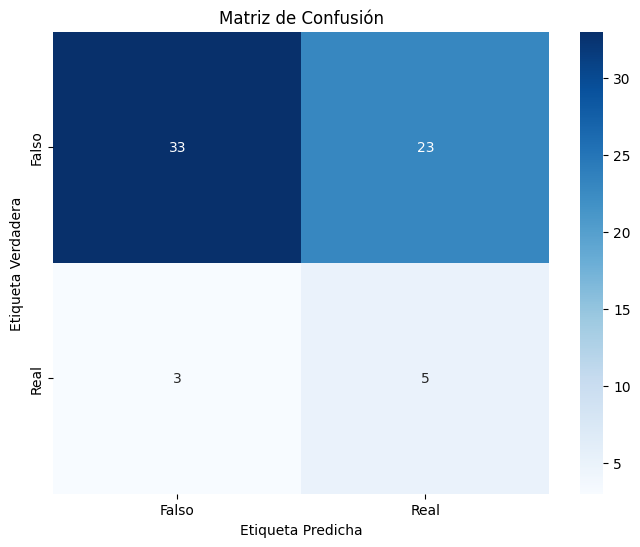

In [ ]:
# Listas para almacenar las etiquetas verdaderas y las predicciones
true_labels = []
predicted_labels = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory3):
    if filename.endswith(".wav"):  # Solo procesar archivos de audio WAV
        audio_path = os.path.join(directory3, filename)

        # Calcular las características del audio
        audio_features = calcular_caracteristicas(audio_path)

        # Utilizar el modelo de Random Forest para predecir la clase del audio
        prediction = best_rf_model.predict([audio_features])

        # Almacenar la etiqueta verdadera y la predicción
        true_labels.append(1 if "original" in filename else 0)  # Si el nombre del archivo contiene "original", la etiqueta verdadera es 1, de lo contrario es 0
        predicted_labels.append(prediction[0])

# Construir la matriz de confusión
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Falso", "Real"], yticklabels=["Falso", "Real"])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()